In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
!unzip -q -o "/content/drive/MyDrive/CodingDojo/Bootcamp - Data Science/Modulo 3/Semana 4/train.zip"

In [ ]:
!unzip -q -o "/content/drive/MyDrive/CodingDojo/Bootcamp - Data Science/Modulo 3/Semana 4/test.zip"

In [ ]:
import glob
glob.glob('train/*')[:5]

['train/dog.822.jpg',
 'train/cat.2883.jpg',
 'train/dog.7557.jpg',
 'train/cat.10116.jpg',
 'train/dog.9914.jpg']

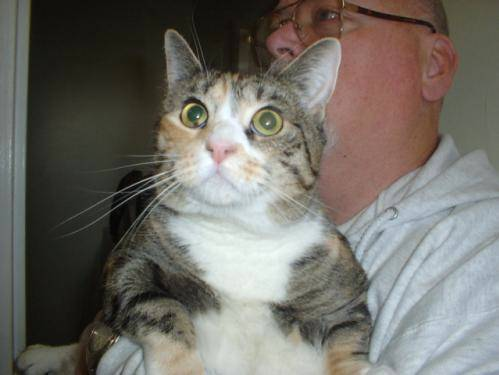

In [ ]:
from PIL import Image
Image.open('train/cat.5978.jpg')

In [ ]:
train = pd.DataFrame({'path': glob.glob('train/*')})
train

,path
0,train/dog.822.jpg
1,train/cat.2883.jpg
2,train/dog.7557.jpg
3,train/cat.10116.jpg
4,train/dog.9914.jpg
...,...
24995,train/cat.2515.jpg
24996,train/dog.8231.jpg
24997,train/cat.11962.jpg
24998,train/dog.2644.jpg


In [ ]:
train['label'] = train['path'].str.extract(r'(dog|cat)')

In [ ]:
train

,path,label
0,train/dog.822.jpg,dog
1,train/cat.2883.jpg,cat
2,train/dog.7557.jpg,dog
3,train/cat.10116.jpg,cat
4,train/dog.9914.jpg,dog
...,...,...
24995,train/cat.2515.jpg,cat
24996,train/dog.8231.jpg,dog
24997,train/cat.11962.jpg,cat
24998,train/dog.2644.jpg,dog


In [ ]:
train = train.sample(frac=0.15, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='path',
    y_col='label',
    target_size=(50, 50),
    batch_size=20,
    class_mode='binary')

Found 3750 validated image filenames belonging to 2 classes.


In [ ]:
train_generator

Arquitectura:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pandas as pd
import numpy as np
import os

In [ ]:
# Creación de modelo
model = Sequential()
# Capas encargadas de obtener información de la imagen
model.add(Conv2D(50, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Capas para la clasificación en base a la información obtenida en
# capas anteriores
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        28864     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 5184)              0

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/30
187/187 [==============================] - 28s 144ms/step - loss: 0.6768 - accuracy: 0.5791 - val_loss: 0.6453 - val_accuracy: 0.6361
Epoch 2/30
187/187 [==============================] - 30s 158ms/step - loss: 0.6191 - accuracy: 0.6576 - val_loss: 0.5421 - val_accuracy: 0.7361
Epoch 3/30
187/187 [==============================] - 26s 141ms/step - loss: 0.5831 - accuracy: 0.6949 - val_loss: 0.4798 - val_accuracy: 0.7528
Epoch 4/30
187/187 [==============================] - 26s 141ms/step - loss: 0.5249 - accuracy: 0.7365 - val_loss: 0.5088 - val_accuracy: 0.7333
Epoch 5/30
187/187 [==============================] - 27s 143ms/step - loss: 0.4796 - accuracy: 0.7689 - val_loss: 0.4033 - val_accuracy: 0.8278
Epoch 6/30
187/187 [==============================] - 27s 143ms/step - loss: 0.4354 - accuracy: 0.7992 - val_loss: 0.3570 - val_accuracy: 0.8278
Epoch 7/30
187/187 [==============================] - 27s 142ms/step - loss: 0.3939 - accuracy: 0.8223 - val_loss: 0.3129 - val_ac

In [ ]:
#history = model.fit(
#      train_generator,
#      steps_per_epoch=train_generator.samples // train_generator.batch_size,
#      epochs=30)

In [ ]:
train_for_test = train.sample(frac=0.10, random_state=10)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=train_for_test,
    x_col='path',
    y_col='label',
    target_size=(50, 50),
    batch_size=20,
    class_mode='binary')

Found 375 validated image filenames belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 1s 41ms/step - loss: 3.3136e-04 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
train_for_test

,path,label
22252,train/dog.4459.jpg,dog
19451,train/dog.1500.jpg,dog
21938,train/cat.7521.jpg,cat
24986,train/dog.1329.jpg,dog
15382,train/cat.5447.jpg,cat
...,...,...
16264,train/cat.4568.jpg,cat
23182,train/dog.11258.jpg,dog
7568,train/cat.6132.jpg,cat
146,train/dog.3000.jpg,dog


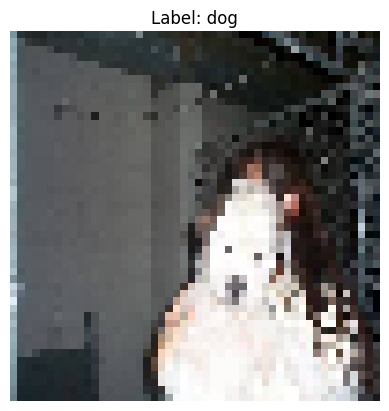

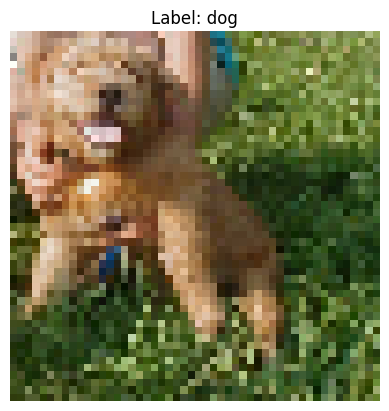

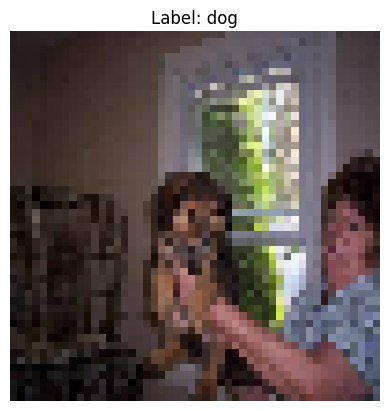

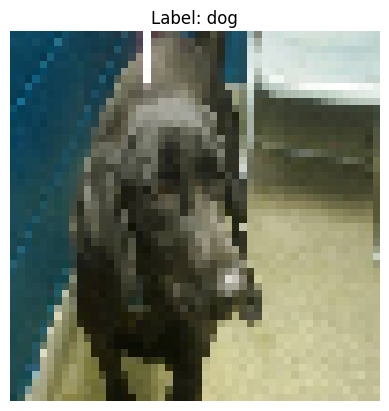

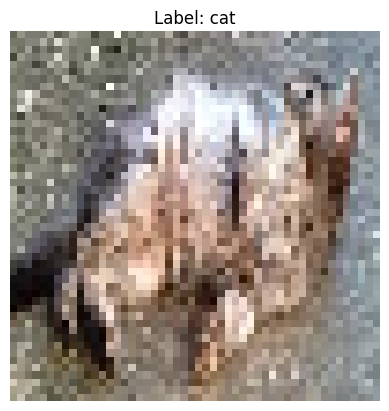

19/19 [==============================] - 1s 43ms/step - loss: 3.3136e-04 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
# Muestra algunas imágenes del conjunto de prueba con sus etiquetas
def show_images(generator, num_images):
    images, labels = next(generator)
    for i in range(num_images):
        plt.imshow(images[i])
        plt.title(f'Label: {"dog" if labels[i] == 1 else "cat"}')
        plt.axis('off')
        plt.show()

# Generar un lote de imágenes de prueba para visualizar
test_images, test_labels = next(test_generator)
show_images(test_generator, 5)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 1s 42ms/step


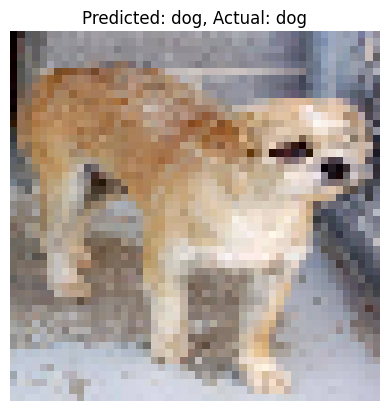

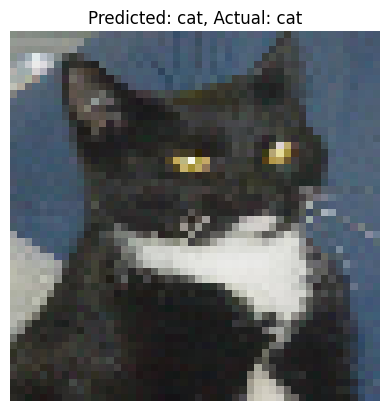

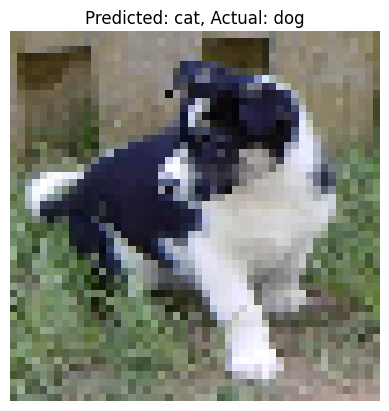

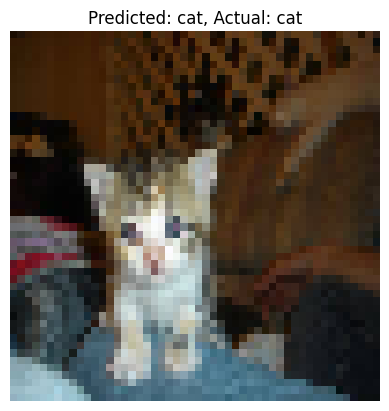

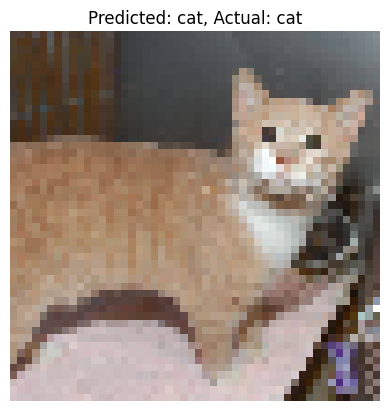

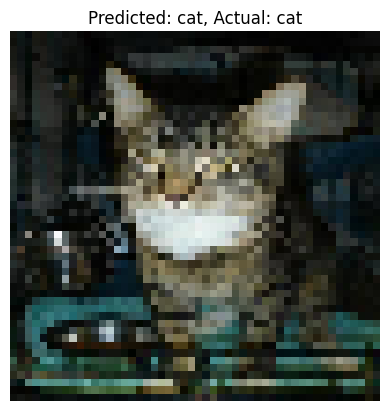

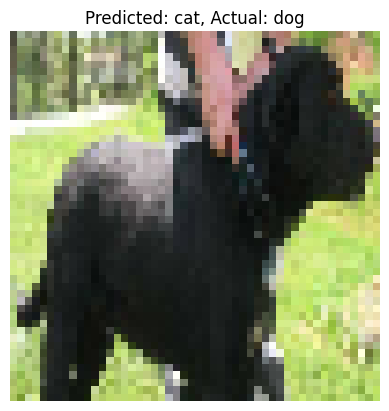

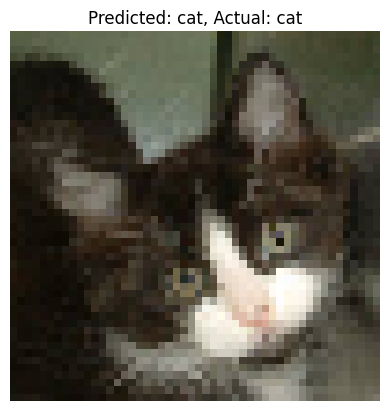

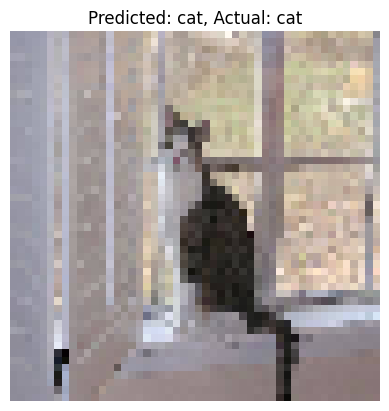

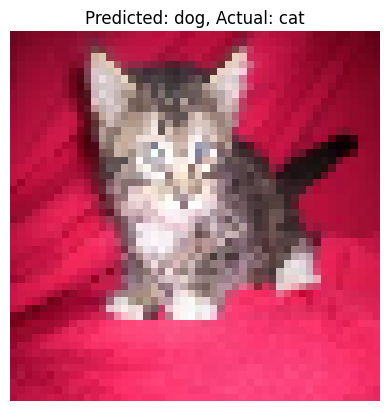

In [ ]:
# Obtener predicciones para el conjunto de prueba
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convertir probabilidades a etiquetas binarias

# Mostrar algunas predicciones con sus etiquetas reales
for i in range(10):
    plt.imshow(test_images[i])
    plt.title(f'Predicted: {"dog" if predicted_labels[i] == 1 else "cat"}, Actual: {"dog" if test_labels[i] == 1 else "cat"}')
    plt.axis('off')
    plt.show()

In [ ]:
# Convertir etiquetas a números
train_for_test['label_num'] = train_for_test['label'].apply(lambda x: 1 if x == 'dog' else 0)

# Crear un generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=train_for_test,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False  # No mezclar las imágenes para mantener el orden
)

# Asegúrate de que el generador esté en la posición inicial
test_generator.reset()

# Convertir las predicciones a etiquetas binarias (0 o 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Asegúrate de que el DataFrame de prueba tiene el mismo orden que las predicciones
train_for_test = train_for_test.reset_index(drop=True)

# Agregar las predicciones al DataFrame
train_for_test['predictions'] = predicted_labels

# Opcional: convertir las etiquetas numéricas de vuelta a 'cat' y 'dog' para facilitar la comparación
train_for_test['predicted_label'] = train_for_test['predictions'].apply(lambda x: 'dog' if x == 1 else 'cat')

# Mostrar algunas filas para verificar
print(train_for_test.head())

Found 375 validated image filenames belonging to 2 classes.
                 path label  label_num  predictions predicted_label
0  train/dog.4459.jpg   dog          1            1             dog
1  train/dog.1500.jpg   dog          1            0             cat
2  train/cat.7521.jpg   cat          0            0             cat
3  train/dog.1329.jpg   dog          1            0             cat
4  train/cat.5447.jpg   cat          0            0             cat


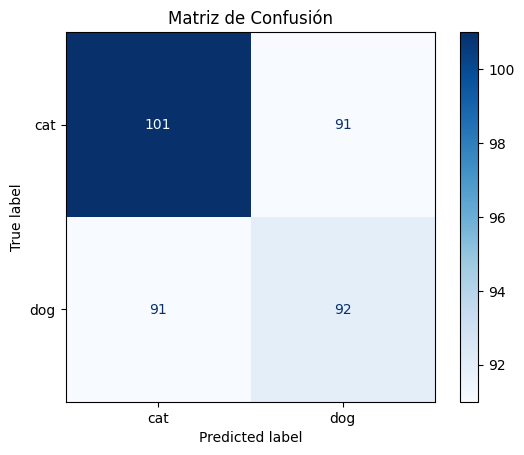

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Extraer las etiquetas reales y las predicciones
true_labels = train_for_test['label_num']
predicted_labels = train_for_test['predictions']

# Crear la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cat', 'dog'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
report = classification_report(true_labels, predicted_labels, target_names=['cat', 'dog'])
print(report)

              precision    recall  f1-score   support

         cat       0.53      0.53      0.53       192
         dog       0.50      0.50      0.50       183

    accuracy                           0.51       375
   macro avg       0.51      0.51      0.51       375
weighted avg       0.51      0.51      0.51       375

